In [18]:

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import pandas as pd


import seaborn as sns
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/57662584/MMAI5000_group_14_project/refs/heads/main/Data-ATP-W119-PEW.csv')
print(df.head())
df.columns = [col[:-5] + '_W119' if col.lower().endswith('_w119') else col for col in df.columns]



     QKEY INTERVIEW_START_W119   INTERVIEW_END_W119  DEVICE_TYPE_W119  \
0  100314  12/13/2022 23:12:27  12/13/2022 23:23:59                 2   
1  100363  12/13/2022 19:50:59  12/13/2022 20:05:29                 2   
2  100598  12/14/2022 16:30:21  12/14/2022 16:47:21                 1   
3  100637  12/14/2022 08:22:09  12/14/2022 08:33:45                 1   
4  100803  12/15/2022 09:05:46  12/15/2022 09:22:29                 1   

   LANG_W119  FORM_W119  DESRISK_COMF_W119  DESRISK_CREAT_W119  \
0          1          1                  4                   3   
1          1          2                  3                   3   
2          1          1                  4                   4   
3          1          2                  2                   1   
4          1          2                  3                   3   

   DESRISK_NTECH_W119  RISK2_W119  ...  F_PARTYLN_FINAL  F_PARTYSUM_FINAL  \
0                   4           2  ...                                  1   
1         

C:\Users\User\AppData\Local\Temp\ipykernel_14448\2529272665.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/57662584/MMAI5000_group_14_project/refs/heads/main/Data-ATP-W119-PEW.csv')


In [5]:
# Extract the specified variables
variables_to_extract = [
    'DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119', 'RISK2_W119',
    'AI_HEARD_W119', 'CNCEXC_W119', 'USEAI_W119',
    'AIKNOW1_W119', 'AIKNOW2_W119', 'AIKNOW3_W119', 'AIKNOW5_W119', 'AIKNOW6_W119', 'AIKNOW7_W119',
    'AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 'AIKNOW3_CORRECT_W119', 
    'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 'AIKNOW7_CORRECT_W119', 'AIKNOW_INDEX_W119',
    'AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119', 'MEDBIAS_W119',
    'AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119', 'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119',
    'HCMEDBIAS_W119', 'EMPLSIT_W119', 'JOBAPPYR_W119', 'INDUSTRYCOMBO_W119',
    'AIWRK2_a_W119', 'AIWRK2_b_W119', 'AIWRK2_c_W119',
    'AIWRK3_a_W119', 'AIWRK3_b_W119', 'AIWRK3_c_W119',
    'AIWRKH1_W119', 'AIWRKH2_a_W119', 'AIWRKH2_b_W119',
    'AIWRKH3_a_W119', 'AIWRKH3_b_W119', 'AIWRKH3_c_W119', 'AIWRKH3_d_W119', 'AIWRKH4_W119',
    'AIWRKM1_W119', 'AIWRKM2_a_W119', 'AIWRKM2_b_W119', 'AIWRKM2_c_W119', 'AIWRKM2_d_W119',
    'AIWRKM2_e_W119', 'AIWRKM2_f_W119', 'AIWRKM3_a_W119', 'AIWRKM3_b_W119', 'AIWRKM3_c_W119',
    'AIWRKM3_d_W119', 'AIWRKM3_e_W119', 'AIWRKM3_f_W119', 'AIWRKM4_a_W119', 'AIWRKM4_b_W119',
    'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_RACECMB', 'F_RACETHNMOD',
    'F_CITIZEN', 'F_BIRTHPLACE', 'F_HISP', 'F_HISP_ORIGIN', 'F_CREGION', 'F_CDIVISION',
    'F_METRO', 'F_REG', 'F_INC_SDT1', 'F_INC_TIER2', 'F_MARITAL', 'F_RELIG',
    'F_RELIGCAT1', 'F_ATTEND', 'F_PARTY_FINAL', 'F_PARTYLN_FINAL', 'F_PARTYSUM_FINAL',
    'F_PARTYSUMIDEO_FINAL', 'F_IDEO'
]

# Check which variables exist in the dataset
available_vars = [var for var in variables_to_extract if var in df.columns]
missing_vars = [var for var in variables_to_extract if var not in df.columns]

print(f"Available variables: {len(available_vars)}")
print(f"Missing variables: {len(missing_vars)}")

if missing_vars:
    print(f"\nMissing variables: {missing_vars}")

# Extract the available variables
df_selected = df[available_vars].copy()

print(f"\nDataset shape after extraction: {df_selected.shape}")
print(f"Selected variables: {list(df_selected.columns)}")

# Display basic info about the extracted dataset
print(f"\nBasic info:")
print(df_selected.info())

Available variables: 87
Missing variables: 0

Dataset shape after extraction: (11004, 87)
Selected variables: ['DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119', 'RISK2_W119', 'AI_HEARD_W119', 'CNCEXC_W119', 'USEAI_W119', 'AIKNOW1_W119', 'AIKNOW2_W119', 'AIKNOW3_W119', 'AIKNOW5_W119', 'AIKNOW6_W119', 'AIKNOW7_W119', 'AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 'AIKNOW3_CORRECT_W119', 'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 'AIKNOW7_CORRECT_W119', 'AIKNOW_INDEX_W119', 'AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119', 'MEDBIAS_W119', 'AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119', 'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119', 'HCMEDBIAS_W119', 'EMPLSIT_W119', 'JOBAPPYR_W119', 'INDUSTRYCOMBO_W119', 'AIWRK2_a_W119', 'AIWRK2_b_W119', 'AIWRK2_c_W119', 'AIWRK3_a_W119', 'AIWRK3_b_W119', 'AIWRK3_c_W119', 'AIWRKH1_W119', 'AIWRKH2_a_W119', 'AIWRKH2_b_W119', 'AIWRKH3_a_W119', 'AIWRKH3_b_W119', 'AIWRKH3_c_W119', 'AIWRKH3_d_W119', 'AIWRKH4_W119', 'AIWRKM1_W119

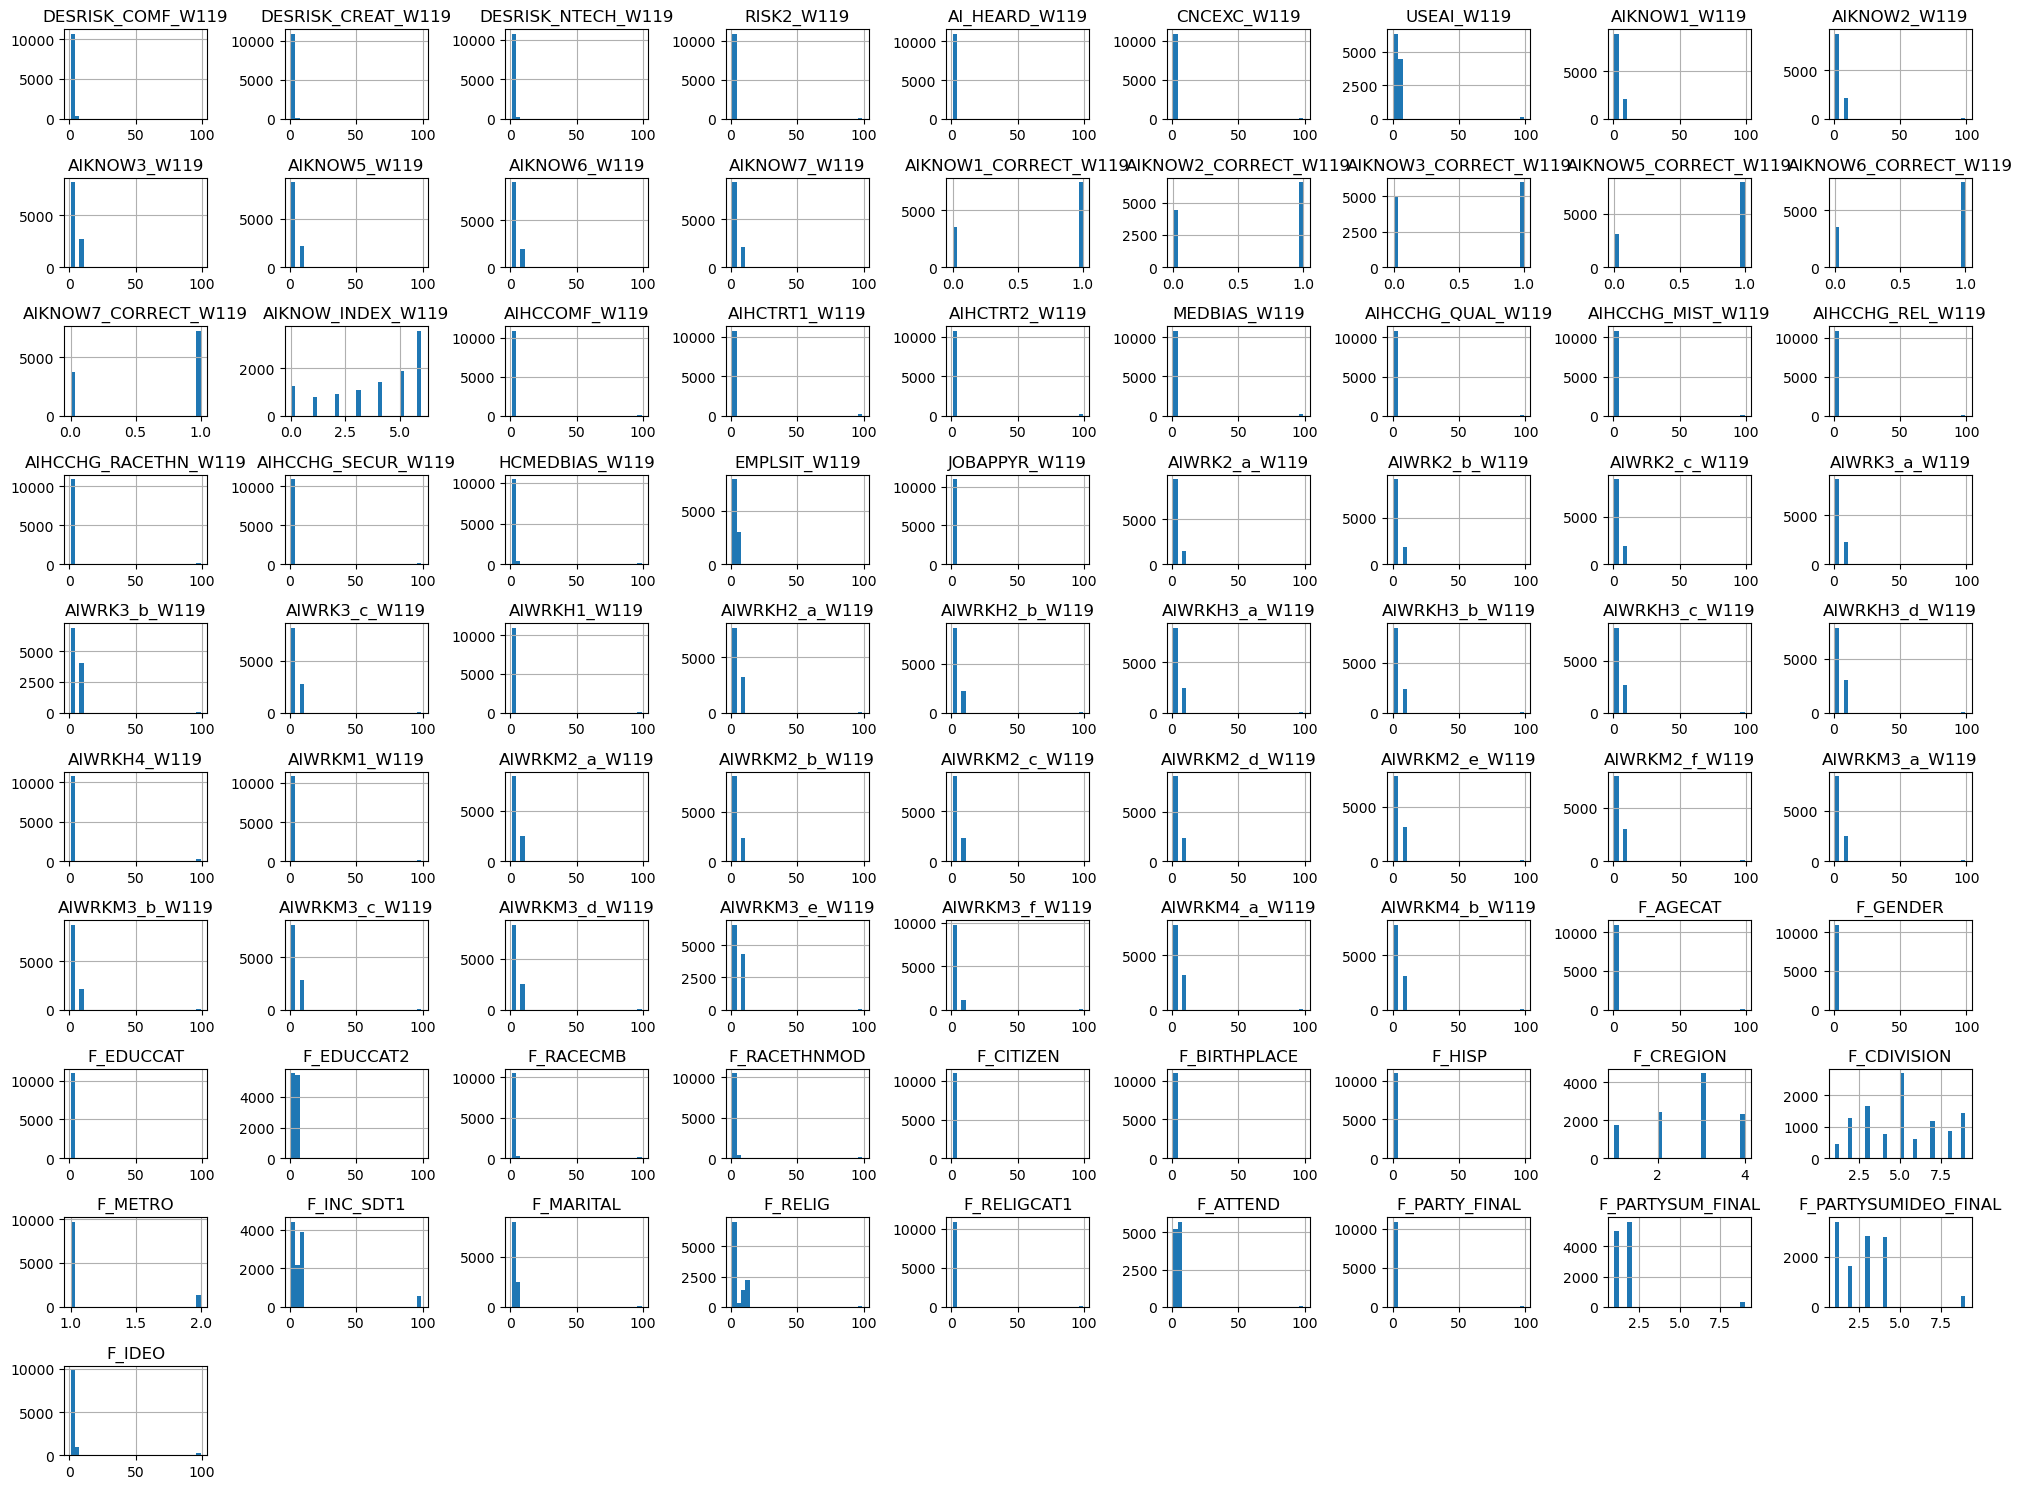


INDUSTRYCOMBO_W119 value counts:
INDUSTRYCOMBO_W119
      4507
2     1052
5      822
3      682
11     666
1      590
9      571
6      559
8      546
4      532
7      290
13     169
99      18
Name: count, dtype: int64

F_HISP_ORIGIN value counts:
F_HISP_ORIGIN
      9522
1      606
8      280
2      145
7      102
3      101
4       75
6       68
99      45
5       33
97      27
Name: count, dtype: int64

F_REG value counts:
F_REG
1     9303
3      844
2      430
       362
99      65
Name: count, dtype: int64

F_INC_TIER2 value counts:
F_INC_TIER2
2     4002
3     2113
1     1597
2     1231
1      686
3      512
99     480
       235
99     148
Name: count, dtype: int64

F_PARTYLN_FINAL value counts:
F_PARTYLN_FINAL
      6843
2     2036
1     1811
99     314
Name: count, dtype: int64


In [6]:
# 查看所有变量的分布情况
import matplotlib.pyplot as plt

# 数值型变量分布（直方图）
num_cols = df_selected.select_dtypes(include=['number']).columns
df_selected[num_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

# 分类型变量分布（前10个变量的频数统计）
cat_cols = df_selected.select_dtypes(include=['object', 'category']).columns
for col in cat_cols[:10]:
    print(f"\n{col} value counts:")
    print(df_selected[col].value_counts(dropna=False))

In [9]:
# 导出数值型变量的描述统计为CSV
num_cols = df_selected.select_dtypes(include=['number']).columns
num_stats = df_selected[num_cols].describe().transpose()
# num_stats.to_csv('numerical_variable_distribution.csv', index=True)
print("Numerical variable distribution saved to 'numerical_variable_distribution.csv'.")

# 导出分类型变量的频数统计为CSV
cat_cols = df_selected.select_dtypes(include=['object', 'category']).columns
cat_stats_list = []
for col in cat_cols:
    value_counts = df_selected[col].value_counts(dropna=False)
    temp_df = value_counts.reset_index()
    temp_df.columns = ['value', 'count']
    temp_df['variable'] = col
    cat_stats_list.append(temp_df)
cat_stats_df = pd.concat(cat_stats_list, ignore_index=True)[['variable', 'value', 'count']]
# cat_stats_df.to_csv('categorical_variable_distribution.csv', index=False)
print("Categorical variable distribution saved to 'categorical_variable_distribution.csv'.")

Numerical variable distribution saved to 'numerical_variable_distribution.csv'.
Categorical variable distribution saved to 'categorical_variable_distribution.csv'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DESRISK_COMF_W119     11004 non-null  category
 1   DESRISK_CREAT_W119    11004 non-null  category
 2   DESRISK_NTECH_W119    11004 non-null  category
 3   RISK2_W119            11004 non-null  category
 4   AI_HEARD_W119         11004 non-null  category
 5   CNCEXC_W119           11004 non-null  category
 6   USEAI_W119            11004 non-null  category
 7   AIKNOW1_W119          11004 non-null  category
 8   AIKNOW2_W119          11004 non-null  category
 9   AIKNOW3_W119          11004 non-null  category
 10  AIKNOW5_W119          11004 non-null  category
 11  AIKNOW6_W119          11004 non-null  category
 12  AIKNOW7_W119          11004 non-null  category
 13  AIKNOW1_CORRECT_W119  11004 non-null  category
 14  AIKNOW2_CORRECT_W119  11004 non-null  category
 15  AI

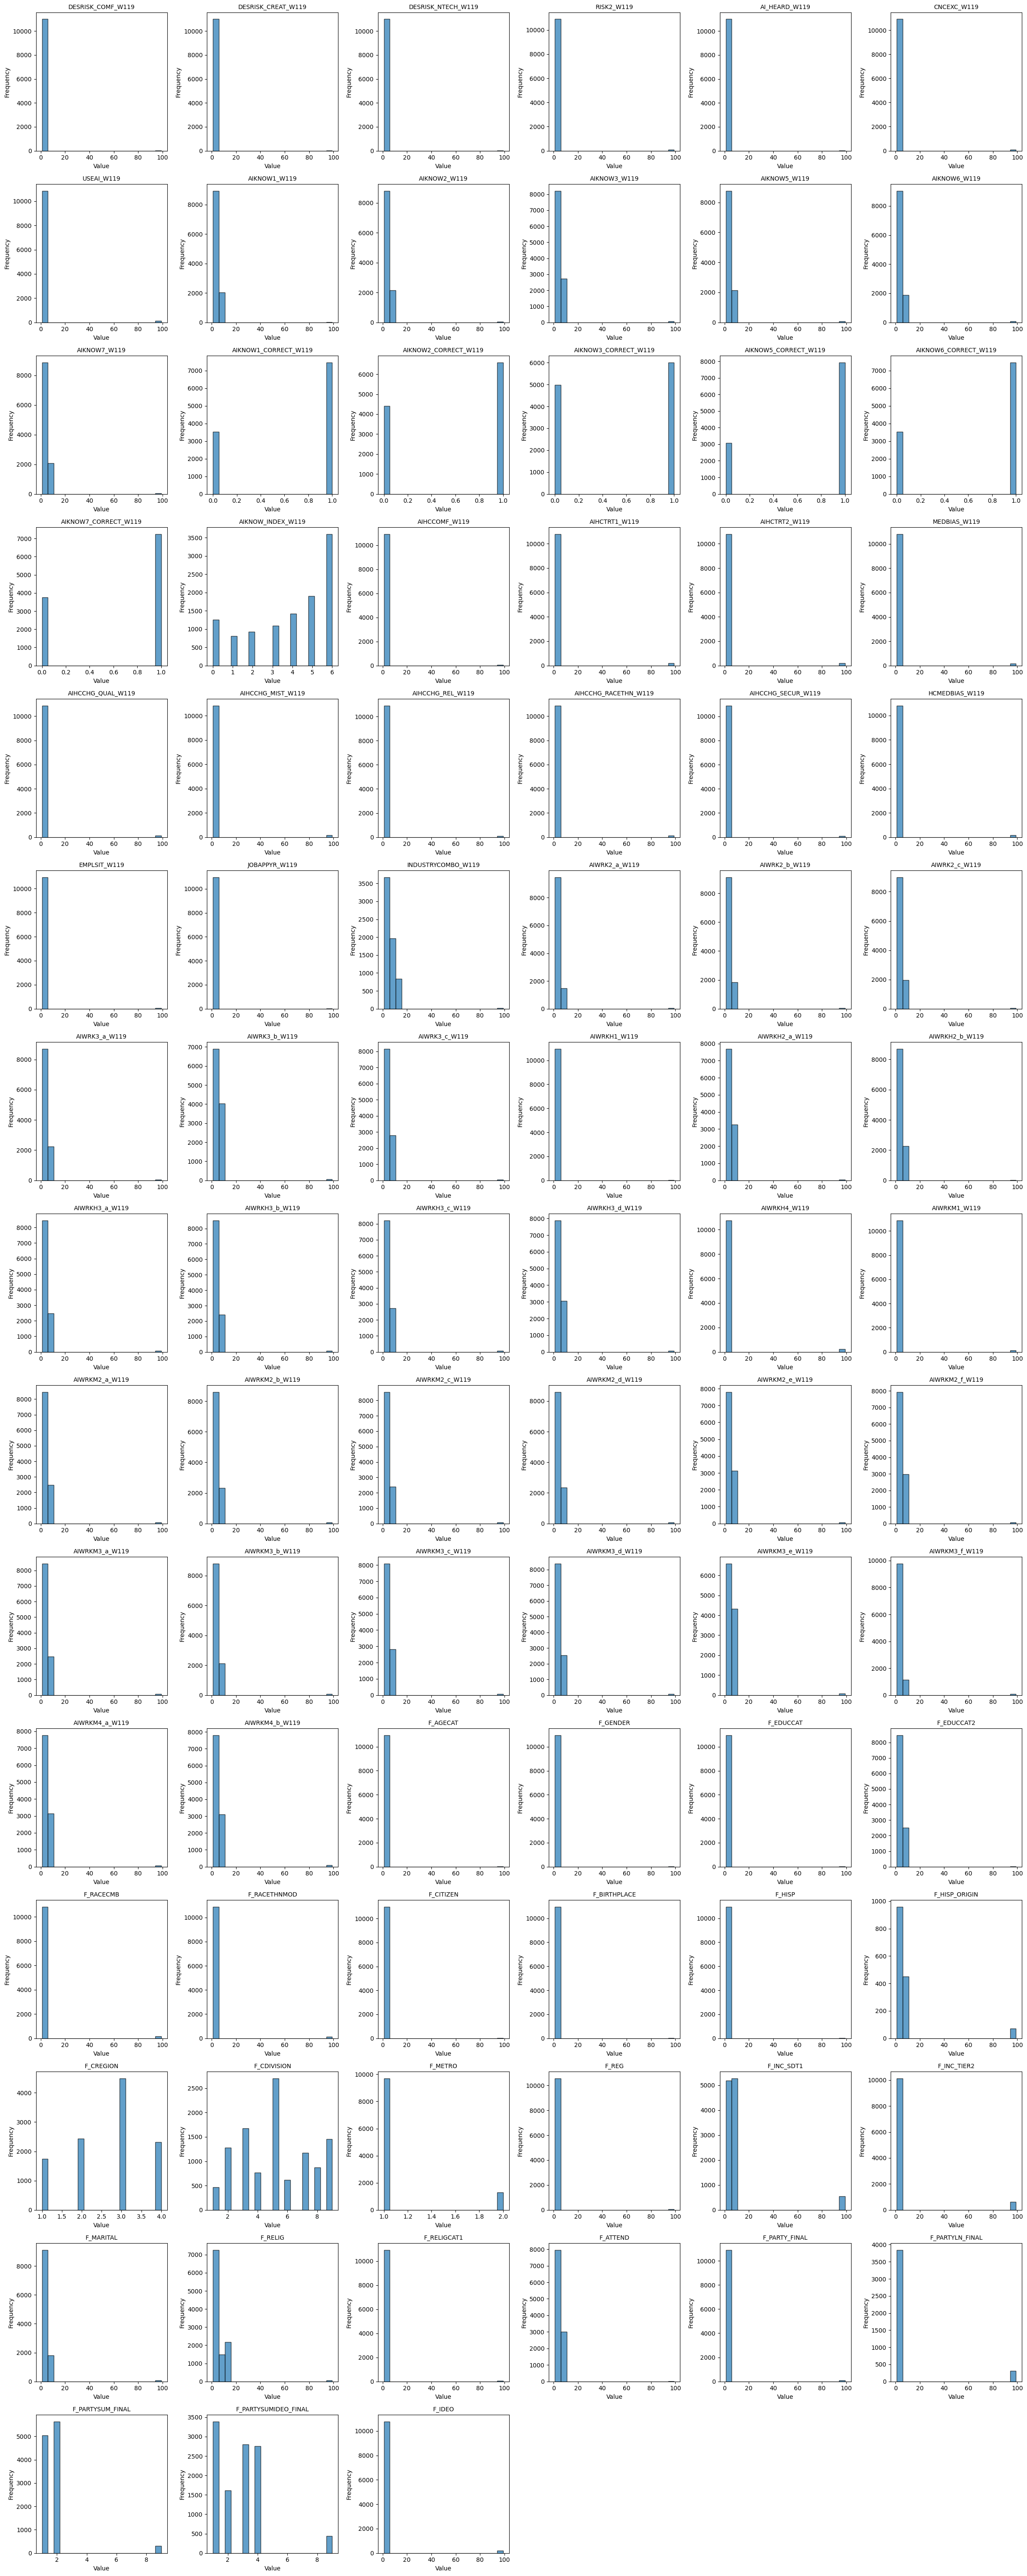

In [10]:
# 批量转换所有列为 category 类型
df_selected = df_selected.astype('category')

print(df_selected.info())
# 将所有变量的分布情况展示在同一个画布上
import matplotlib.pyplot as plt
import numpy as np

# 将 category 类型转换为数值型以便绘制直方图
df_numeric = df_selected.copy()
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# 计算子图的行列数
n_vars = len(df_numeric.columns)
n_cols = 6  # 每行6个子图
n_rows = (n_vars + n_cols - 1) // n_cols  # 向上取整

# 创建画布和子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# 绘制每个变量的直方图
for i, col in enumerate(df_numeric.columns):
    if i < len(axes):
        # 过滤掉NaN值
        data = df_numeric[col].dropna()
        if len(data) > 0:
            axes[i].hist(data, bins=20, alpha=0.7, edgecolor='black')
            axes[i].set_title(col, fontsize=10)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
        else:
            axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(col, fontsize=10)

# 隐藏多余的子图
for i in range(len(df_numeric.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Missing values after cleaning:
F_HISP_ORIGIN         9594
F_PARTYLN_FINAL       7157
INDUSTRYCOMBO_W119    4525
F_INC_TIER2            863
F_INC_SDT1             542
                      ... 
F_CITIZEN               13
DESRISK_NTECH_W119       8
AI_HEARD_W119            8
DESRISK_COMF_W119        7
DESRISK_CREAT_W119       6
Length: 75, dtype: int64

Missing value percentages:
F_HISP_ORIGIN         87.186478
F_PARTYLN_FINAL       65.039985
INDUSTRYCOMBO_W119    41.121410
F_INC_TIER2            7.842603
F_INC_SDT1             4.925482
                        ...    
F_CITIZEN              0.118139
AI_HEARD_W119          0.072701
DESRISK_NTECH_W119     0.072701
DESRISK_COMF_W119      0.063613
DESRISK_CREAT_W119     0.054526
Length: 75, dtype: float64

Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  

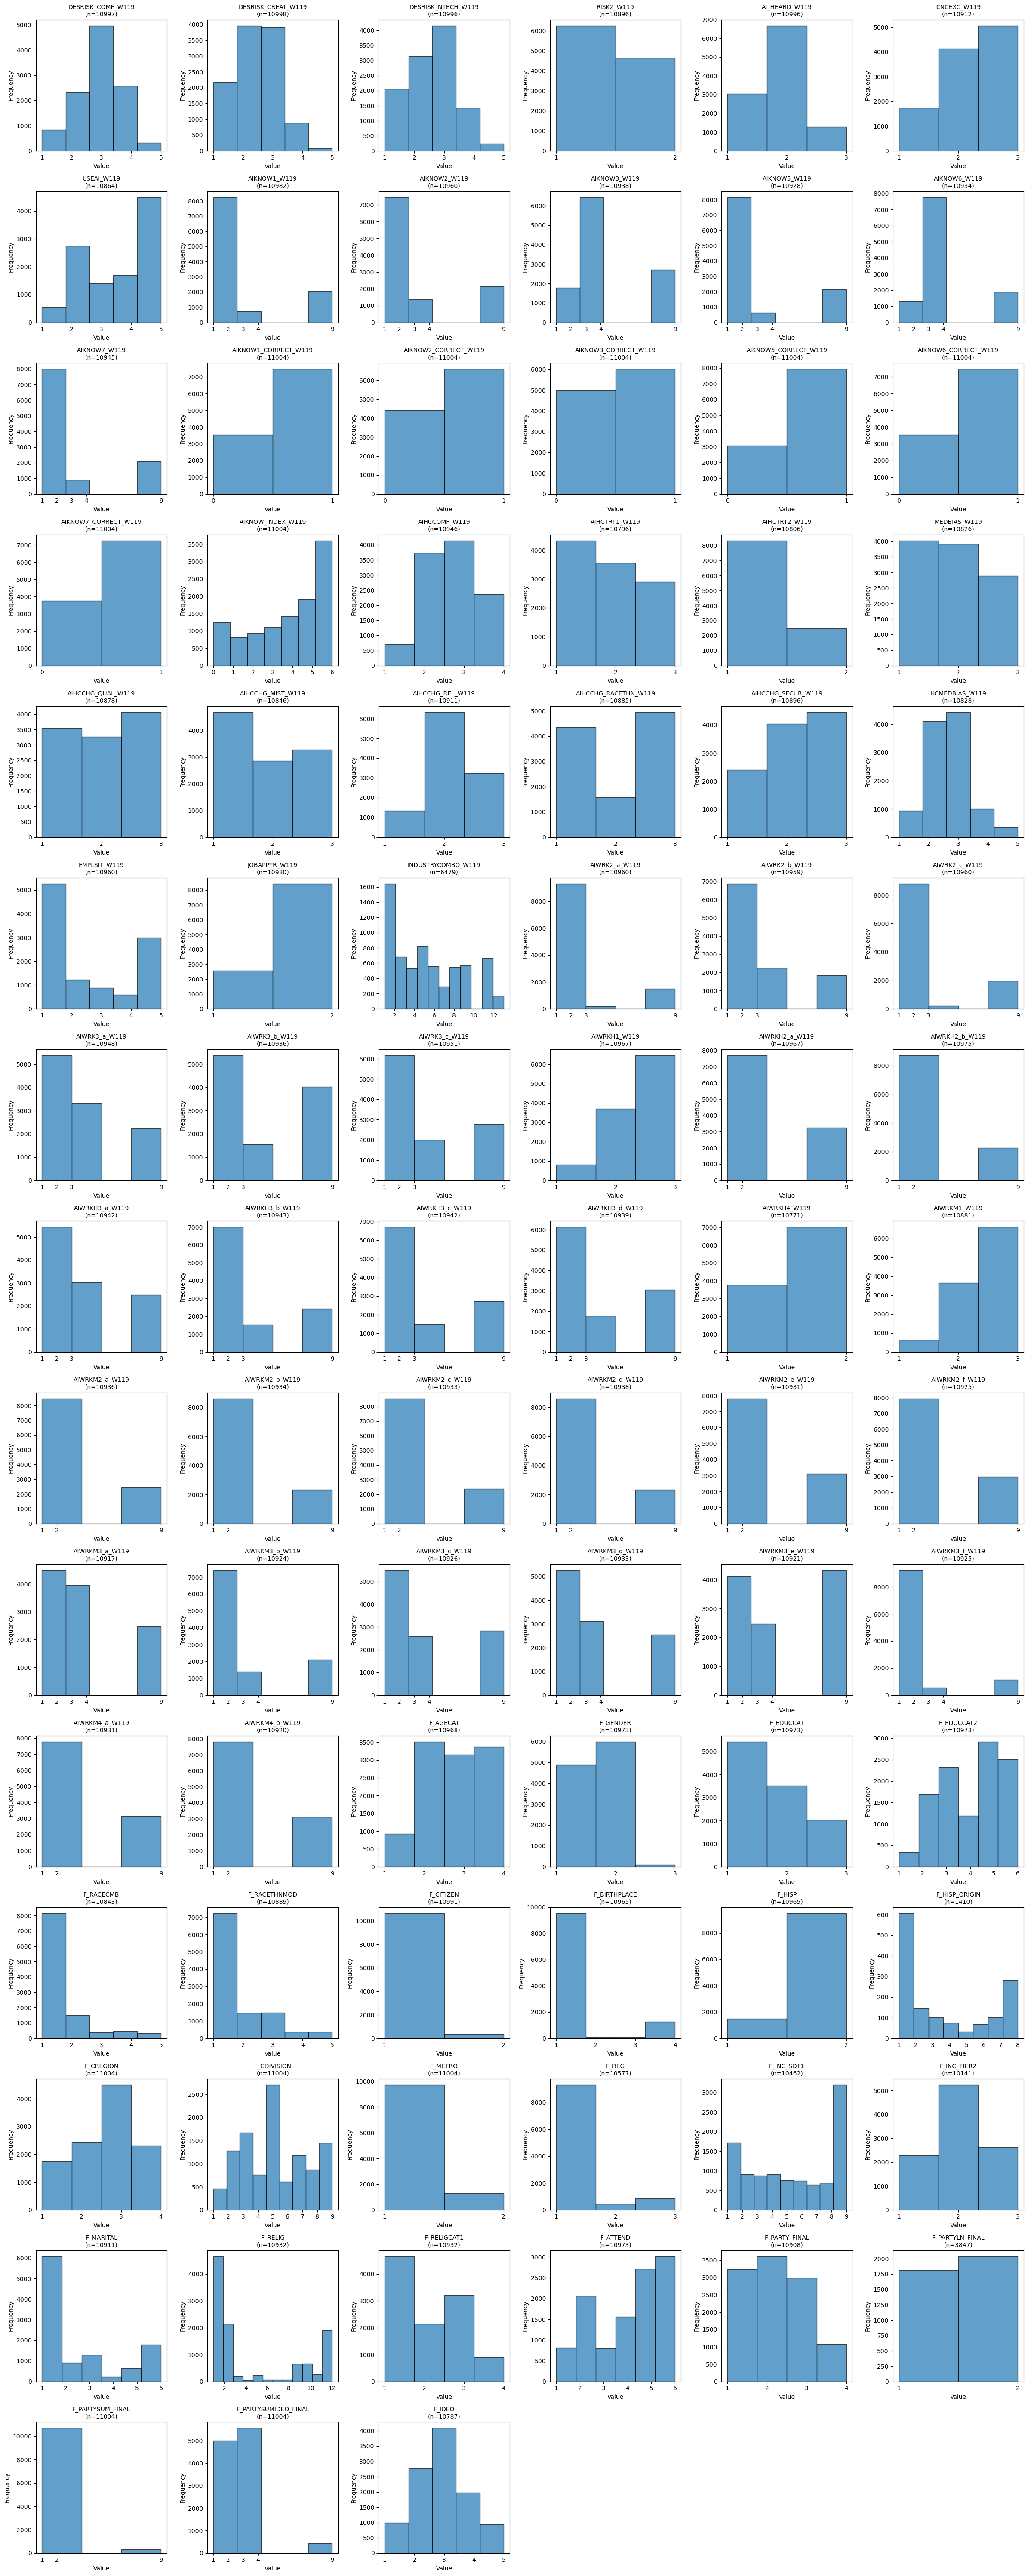

Original data shape: (11004, 87)
Cleaned data shape: (11004, 87)
Total missing values removed: 6376


In [11]:
# 处理缺失值编码
import numpy as np

# 先将所有变量转换回数值型以便处理
df_cleaned = df_selected.copy()
for col in df_cleaned.columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 定义需要替换为NaN的值
missing_codes = [97, 98, 99]

# 替换缺失值编码为NaN
for col in df_cleaned.columns:
    df_cleaned[col] = df_cleaned[col].replace(missing_codes, np.nan)

# 检查缺失值情况
print("Missing values after cleaning:")
missing_summary = df_cleaned.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)

# 计算缺失值比例
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(f"\nMissing value percentages:")
print(missing_percentage)

# 显示清理后的数据信息
print(f"\nDataset info after cleaning:")
print(df_cleaned.info())

# 绘制清理后所有变量的直方图
import matplotlib.pyplot as plt
import numpy as np

# 计算子图的行列数
n_vars = len(df_cleaned.columns)
n_cols = 6  # 每行6个子图
n_rows = (n_vars + n_cols - 1) // n_cols  # 向上取整

# 创建画布和子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# 绘制每个变量的直方图
for i, col in enumerate(df_cleaned.columns):
    if i < len(axes):
        # 过滤掉NaN值
        data = df_cleaned[col].dropna()
        if len(data) > 0:
            # 设置合适的bins数量
            unique_vals = len(data.unique())
            bins = min(20, unique_vals) if unique_vals > 1 else 1
            
            axes[i].hist(data, bins=bins, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{col}\n(n={len(data)})', fontsize=10)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
            
            # 如果值较少，显示具体数值
            if unique_vals <= 10:
                axes[i].set_xticks(sorted(data.unique()))
        else:
            axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(col, fontsize=10)

# 隐藏多余的子图
for i in range(len(df_cleaned.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 打印清理前后的数据形状对比
print(f"Original data shape: {df_selected.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")
print(f"Total missing values removed: {(df_selected == 99).sum().sum() + (df_selected == 98).sum().sum() + (df_selected == 97).sum().sum()}")

In [12]:
# 将Likert量表响应重新编码为有序数值
import numpy as np

# 创建重编码后的数据副本
df_recoded = df_cleaned.copy()

# 定义常见的Likert量表编码映射
# 根据PEW数据的常见编码方式进行重新编码

# 对于态度/同意程度变量 (通常1=非常同意, 2=有点同意, 3=有点不同意, 4=非常不同意)
# 重新编码为 4=非常同意, 3=有点同意, 2=有点不同意, 1=非常不同意
attitude_vars = [
    'DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119',
    'AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119'
]

for var in attitude_vars:
    if var in df_recoded.columns:
        # 反向编码：1->4, 2->3, 3->2, 4->1
        df_recoded[var] = df_recoded[var].replace({1: 4, 2: 3, 3: 2, 4: 1})

# 对于频率变量 (1=从不, 2=很少, 3=有时, 4=经常)
# 保持原编码或根据需要调整
frequency_vars = [
    'USEAI_W119'
]

# 对于是否变量 (1=是, 2=否)
# 重新编码为 1=是, 0=否
binary_vars = [
    'AI_HEARD_W119', 'AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 
    'AIKNOW3_CORRECT_W119', 'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 
    'AIKNOW7_CORRECT_W119'
]

for var in binary_vars:
    if var in df_recoded.columns:
        # 1=是->1, 2=否->0
        df_recoded[var] = df_recoded[var].replace({2: 0})

# 对于变化程度变量 (1=大幅改善, 2=有所改善, 3=没有变化, 4=有所恶化, 5=大幅恶化)
# 重新编码为 5=大幅改善, 4=有所改善, 3=没有变化, 2=有所恶化, 1=大幅恶化
change_vars = [
    'AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119', 
    'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119'
]

for var in change_vars:
    if var in df_recoded.columns:
        # 反向编码：1->5, 2->4, 3->3, 4->2, 5->1
        df_recoded[var] = df_recoded[var].replace({1: 5, 2: 4, 4: 2, 5: 1})

print("Likert scale variables have been recoded to ordinal numeric values.")
print("\nRecoding summary:")
print(f"- Attitude variables (reversed): {attitude_vars}")
print(f"- Binary variables (1=Yes, 0=No): {binary_vars}")
print(f"- Change variables (reversed): {change_vars}")

# 显示重编码后的数据信息
print(f"\nDataset info after recoding:")
print(df_recoded.info())

# 显示几个重编码变量的分布
print(f"\nSample distributions after recoding:")
for var in attitude_vars[:3]:
    if var in df_recoded.columns:
        print(f"\n{var}:")
        print(df_recoded[var].value_counts(dropna=False).sort_index())

Likert scale variables have been recoded to ordinal numeric values.

Recoding summary:
- Attitude variables (reversed): ['DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119', 'AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119']
- Binary variables (1=Yes, 0=No): ['AI_HEARD_W119', 'AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 'AIKNOW3_CORRECT_W119', 'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 'AIKNOW7_CORRECT_W119']
- Change variables (reversed): ['AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119', 'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119']

Dataset info after recoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DESRISK_COMF_W119     10997 non-null  float64
 1   DESRISK_CREAT_W119    10998 non-null  float64
 2   DESRISK_NTECH_W119    10996 non-null  float64
 3   RISK2_W119            10896 

In [13]:
# 创建基于年龄、技术熟悉度和AI怀疑程度的二元/分组变量
import numpy as np

# 创建特征工程后的数据副本
df_features = df_recoded.copy()

# 1. 年龄分组变量 (age_group)
if 'F_AGECAT' in df_features.columns:
    # 将年龄连续值分箱为三组
    df_features['age_group'] = np.select([
        df_features['F_AGECAT'] <= 2,      # 年轻组 (18-39)
        df_features['F_AGECAT'].between(3, 4),  # 中年组 (40-64)
        df_features['F_AGECAT'] >= 5       # 年长组 (65+)
    ], [1, 2, 3], default=np.nan)
    
    # 创建年龄二元变量
    df_features['age_young'] = np.where(df_features['F_AGECAT'] <= 2, 1, 0)
    df_features['age_senior'] = np.where(df_features['F_AGECAT'] >= 5, 1, 0)

# 2. AI接受度得分 (AI_acceptance_score)
# 基于关键AI相关题目构建复合得分
ai_acceptance_vars = []

# 添加AI医疗信任相关变量
healthcare_trust_vars = ['AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119']
available_hc_vars = [var for var in healthcare_trust_vars if var in df_features.columns]
ai_acceptance_vars.extend(available_hc_vars)

# 添加AI风险感知变量（已反向编码，数值越高越接受）
risk_vars = ['DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119']
available_risk_vars = [var for var in risk_vars if var in df_features.columns]
ai_acceptance_vars.extend(available_risk_vars)

# 添加AI使用频率
if 'USEAI_W119' in df_features.columns:
    ai_acceptance_vars.append('USEAI_W119')

# 添加AI听说过的情况
if 'AI_HEARD_W119' in df_features.columns:
    ai_acceptance_vars.append('AI_HEARD_W119')

# 计算AI接受度综合得分
if ai_acceptance_vars:
    # 标准化各变量到0-1范围
    df_standardized = df_features[ai_acceptance_vars].copy()
    for var in ai_acceptance_vars:
        min_val = df_features[var].min()
        max_val = df_features[var].max()
        if max_val > min_val:
            df_standardized[var] = (df_features[var] - min_val) / (max_val - min_val)
    
    # 计算平均得分
    df_features['AI_acceptance_score'] = df_standardized.mean(axis=1)
    
    # 创建高/低AI接受度二元变量
    df_features['high_ai_acceptance'] = np.where(df_features['AI_acceptance_score'] > 0.5, 1, 0)

# 3. 技术素养指数 (tech_literacy_index)
# 基于对新兴技术适应度问题构建
tech_literacy_vars = []

# AI知识正确性变量
ai_knowledge_vars = ['AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 'AIKNOW3_CORRECT_W119', 
                     'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 'AIKNOW7_CORRECT_W119']
available_knowledge_vars = [var for var in ai_knowledge_vars if var in df_features.columns]
tech_literacy_vars.extend(available_knowledge_vars)

# AI使用频率
if 'USEAI_W119' in df_features.columns:
    tech_literacy_vars.append('USEAI_W119')

# AI知识指数（如果存在）
if 'AIKNOW_INDEX_W119' in df_features.columns:
    tech_literacy_vars.append('AIKNOW_INDEX_W119')

# 计算技术素养指数
if tech_literacy_vars:
    # 对于二元变量（AI知识正确性），直接使用
    # 对于连续变量，标准化到0-1范围
    df_tech_standardized = df_features[tech_literacy_vars].copy()
    
    for var in tech_literacy_vars:
        if var in available_knowledge_vars:
            # 二元变量保持不变
            continue
        else:
            # 连续变量标准化
            min_val = df_features[var].min()
            max_val = df_features[var].max()
            if max_val > min_val:
                df_tech_standardized[var] = (df_features[var] - min_val) / (max_val - min_val)
    
    # 计算技术素养指数
    df_features['tech_literacy_index'] = df_tech_standardized.mean(axis=1)
    
    # 创建高/低技术素养二元变量
    df_features['high_tech_literacy'] = np.where(df_features['tech_literacy_index'] > 0.5, 1, 0)

# 4. 创建交互变量
# 年轻高技术素养用户
if 'age_young' in df_features.columns and 'high_tech_literacy' in df_features.columns:
    df_features['young_tech_savvy'] = df_features['age_young'] * df_features['high_tech_literacy']

# 年长低AI接受度用户
if 'age_senior' in df_features.columns and 'high_ai_acceptance' in df_features.columns:
    df_features['senior_ai_resistant'] = df_features['age_senior'] * (1 - df_features['high_ai_acceptance'])

# 5. 创建综合分组变量
if 'age_group' in df_features.columns and 'AI_acceptance_score' in df_features.columns:
    # 基于年龄和AI接受度创建四分组
    df_features['age_ai_profile'] = np.select([
        (df_features['age_group'] <= 2) & (df_features['AI_acceptance_score'] > 0.5),  # 年轻+高接受度
        (df_features['age_group'] <= 2) & (df_features['AI_acceptance_score'] <= 0.5), # 年轻+低接受度
        (df_features['age_group'] >= 3) & (df_features['AI_acceptance_score'] > 0.5),  # 年长+高接受度
        (df_features['age_group'] >= 3) & (df_features['AI_acceptance_score'] <= 0.5)  # 年长+低接受度
    ], [1, 2, 3, 4], default=np.nan)

# 显示新创建的变量
new_vars = [col for col in df_features.columns if col not in df_recoded.columns]
print("Newly created variables:")
for var in new_vars:
    print(f"- {var}")

# 显示关键变量的分布情况
key_vars = ['age_group', 'AI_acceptance_score', 'tech_literacy_index']
print("\nDistribution of key variables:")
for var in key_vars:
    if var in df_features.columns:
        print(f"\n{var}:")
        if var == 'age_group':
            print(df_features[var].value_counts(dropna=False).sort_index())
        else:
            print(df_features[var].describe())

# 显示二元变量的分布
binary_vars = ['high_ai_acceptance', 'high_tech_literacy', 'young_tech_savvy', 'senior_ai_resistant']
print("\nDistribution of binary variables:")
for var in binary_vars:
    if var in df_features.columns:
        print(f"\n{var}:")
        print(df_features[var].value_counts(dropna=False))

# 显示数据维度变化
print(f"\nDataset shape before feature engineering: {df_recoded.shape}")
print(f"Dataset shape after feature engineering: {df_features.shape}")
print(f"Number of new variables created: {len(new_vars)}")

# 保存处理后的数据
print(f"\nFinal dataset ready for analysis with {df_features.shape[1]} variables and {df_features.shape[0]} observations.")

Newly created variables:
- age_group
- age_young
- age_senior
- AI_acceptance_score
- high_ai_acceptance
- tech_literacy_index
- high_tech_literacy
- young_tech_savvy
- senior_ai_resistant
- age_ai_profile

Distribution of key variables:

age_group:
age_group
1.0    4444
2.0    6524
NaN      36
Name: count, dtype: int64

AI_acceptance_score:
count    11004.000000
mean         0.467192
std          0.109726
min          0.050000
25%          0.395833
50%          0.467708
75%          0.541667
max          0.906250
Name: AI_acceptance_score, dtype: float64

tech_literacy_index:
count    11004.000000
mean         0.648269
std          0.294663
min          0.000000
25%          0.416667
50%          0.729167
75%          0.906250
max          1.000000
Name: tech_literacy_index, dtype: float64

Distribution of binary variables:

high_ai_acceptance:
high_ai_acceptance
0    7045
1    3959
Name: count, dtype: int64

high_tech_literacy:
high_tech_literacy
1    7619
0    3385
Name: count, dtyp

In [21]:
def plot_vars(df, max_cat_unique=20, bins=20, cols=5, figsize=(20, 4)):
    """
    在同一个画布上展示DataFrame所有变量的bar或histogram。

    参数
    ----
    df : pandas.DataFrame
    max_cat_unique : int，unique数量小于等于该值则按分类变量画bar
    bins : int，直方图分bin数
    cols : int，每行显示的子图数
    figsize : tuple，每行子图的画布大小
    """
    n = len(df.columns)
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1]*rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        if pd.api.types.is_numeric_dtype(df[col]):
            # 数值型变量
            sns.histplot(df[col].dropna(), bins=bins, kde=False, ax=ax)
            ax.set_title(f'Hist of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
        else:
            n_unique = df[col].nunique(dropna=True)
            if n_unique <= max_cat_unique:
                sns.countplot(x=col, data=df, ax=ax)
                ax.set_title(f'Bar of {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Count')
                ax.tick_params(axis='x', rotation=30)
            else:
                ax.set_visible(False)  # 不显示此子图
                print(f"{col} 变量unique值太多（{n_unique}），跳过")
    # 隐藏多余的空子图
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

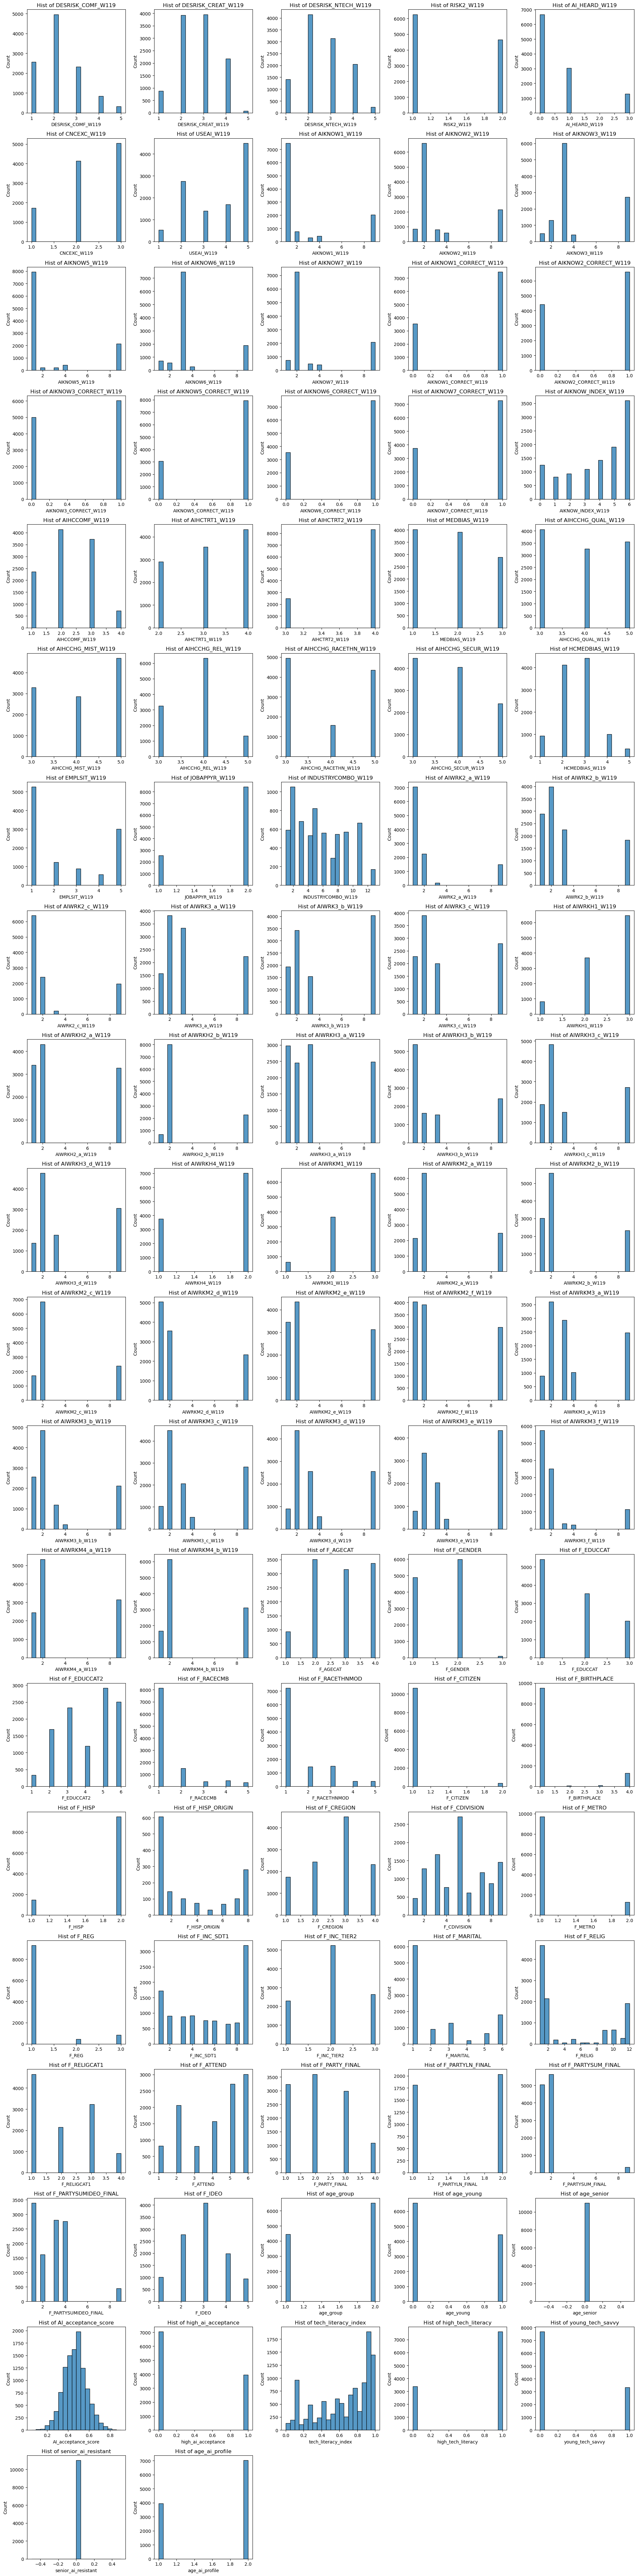

In [22]:
import seaborn as sns

plot_vars(df_features)
